# Module 2: Epidemic Modeling Template

## Team Members:
Abhiram Ruthala, Tahseen Azad 

## Project Title:
*(Fill in)*

## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

## 1. Data and disease background
You can fill out this section throughout the module as you uncover more information about the mystery disease.

By the end of the module (when submitting), you should have some information about each of the following points:
* Prevalence & incidence in the UVA population
* Economic burden (you can generalize from respiratory viruses)
* Symptoms
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology - you can generalize from viral biology)


## 2. Data Analysis
This section should be filled out sequentially as a full report of the work you've done over this module. You can copy and paste code from any main.py file here, and run it to produce plots. Once you gain more information throughout the module, you do not need to go back and "fix" earlier results. In other words, if your early predictions are found to be wrong when gaining new data, do not go back and rewrite them.

### 2a. Methods

We used a variety of methods for the analysis of the disease data as we learned throughout the classroom disease updates!


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #1</b> 

</div>



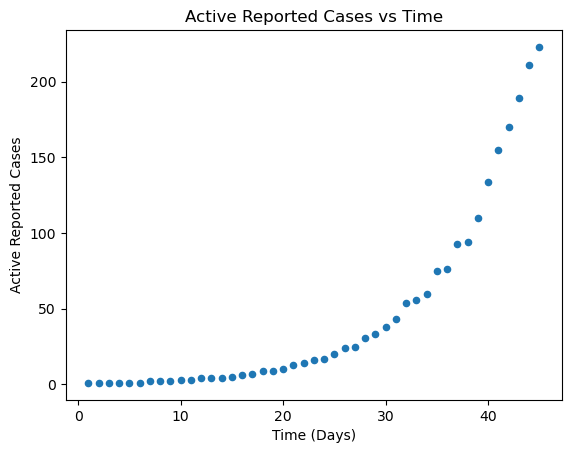

In [1]:
#creating a scatterplot of Active Reported Cases vs. Time

import pandas as pd
import matplotlib.pyplot as plt

#%%
# Load the data
data = pd.read_csv("C://Users//tta20//OneDrive - University of Virginia//BME 2315 (Comp)//Module 2//Module-2-Epidemics-SIR-Modeling-Abhiram-Tahseen//Data//mystery_virus_daily_active_counts_RELEASE#1.csv", parse_dates=['date'], header=0, index_col=None)

#%%
# Make a plot of the active cases over time
data.plot.scatter(x='day', y='active reported daily cases')

plt.xlabel('Time (Days)') 
plt.ylabel('Active Reported Cases') 
plt.title('Active Reported Cases vs Time')
plt.show()

Here are our results from Data Release #1. We were able to plot a graph for how the infection rates are going up over time, signaling an exponential curve. We also integrated a line of best fit to properly model the data, as well as acquire specific values for disease interpretation, such as transmission rate, and many others, so that we can make accurate conclusions on the data. These are to be described further in the latter parts!

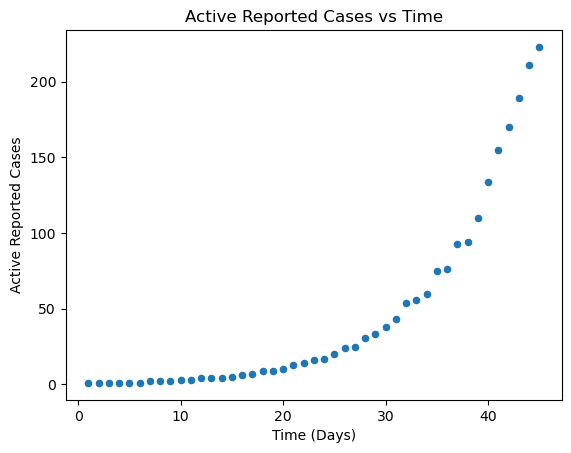



## What do you notice about the initial infections?
The initial infections start off low, as expected. There aren't many infections, and the rate at which the infections are growing across the population is also low compared to later. Overall, it is typical of an emerging outbreak, with just a few infections and several extra getting infected over time, giving us an idea of how this disease is manifesting over time.

## How could we measure how quickly it's spreading?
We can measure how quickly it is spreading by acquiring a line of best fit and reading the slope of that. To get more specific, we can take intervals, such as the weekly intervals offered by the data, calculate the rate of growth in infections over all those weeks, and then average those too. These two methods will give you a solid estimate, that is relatively, but not fully, representative of the growth rate of the infection. If we want a recent estimate for how quickly it is spreading, we can just take the slope over the most recent week of data and model it from there.

## What information about the virus would be helpful in determining the shape of the outbreak curve?
I'd say that we should clean up the two discrepancies that come with this data before improving the information. If there were means to see any physiological signal changes for people who end up in that 2 day pre-symptomatic window, we can apply the same formula of Beta onto them to get an average sense of how many people they're affecting, giving us a more accurate view of how many are infected, and how many will be in the future. Secondly, if we can remove the reporting delays, ideally through computer automation of data retrieval and parsing, we can get more accurate numbers, allowing us to see more idealized, and personalized, interventions, and not misrepresenting treatments.  


### 2b. Plot the data & estimate initial growth rate (R0) from early data (through day 45)
This section should come from your python code after Data Release #1.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #2</b> 

</div>



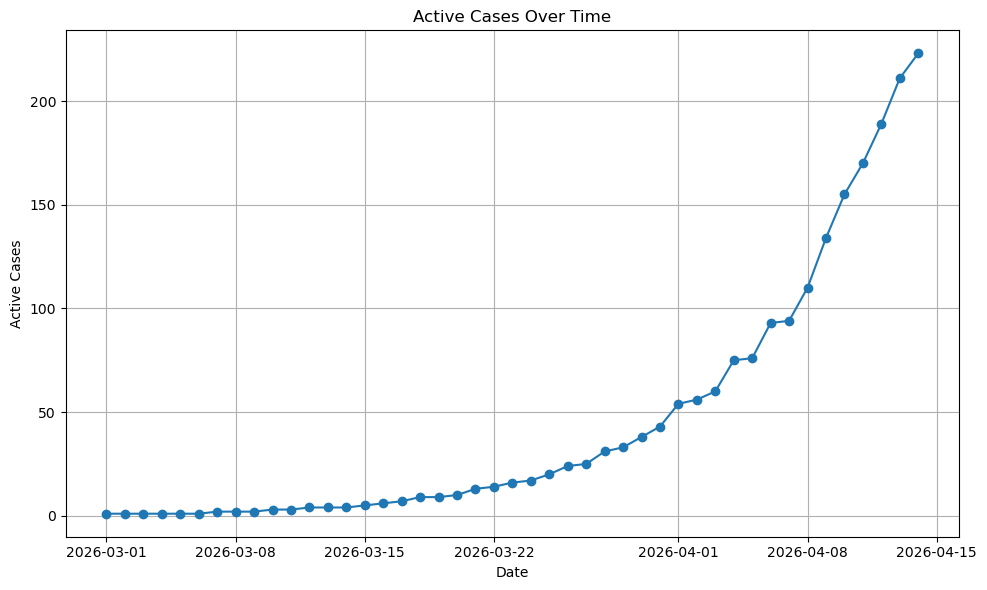

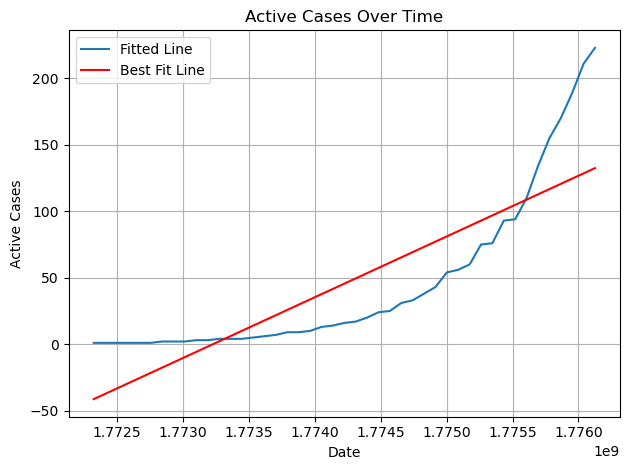

Estimated R0 with infectious rate: 0.00041167105841007946


In [ ]:
#%%

# Import all the necessary modules to do this analysis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy import stats
from sklearn.linear_model import LinearRegression

#%%
# Load the data
data = pd.read_csv('/Users/abhiramruthala/Module 2 - BME 2315/mystery_virus_daily_active_counts_RELEASE#1.csv', parse_dates=['date'], header=0, index_col=None)

#%%
# Make a plot of the active cases over time

#plot scatterplot/lineplot of days vs. active infections - This is shown above, but is still described here because we add an exponential fit to this graph.
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['active reported daily cases'], marker='o', linestyle='-') # Line style makes the scatterplot a line plot.
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.grid()
plt.tight_layout()
plt.show()

# Put fit to the exponential growth in the above graph by sorting the data into specific x and y numpy arrays.
x = np.array(data['date'].map(pd.Timestamp.timestamp)).reshape(-1, 1)
y = np.array(data['active reported daily cases'])

# Conduct linear regression on the data by using np.polyfit
logistics = np.polyfit(x.flatten(), y, 1)
m = logistics[0] # Slope of the graph
b = logistics[1]

# Create the regression equation.
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = m * x_line + b

# Plot the same exponential graph with the fit and see how the fit aids in understanding the graph better.
plt.plot(x, y, label='Fitted Line')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# Use data from class resources to estimate infectious rates. Infectious rate is described as 1 / infectious period.

# In the data, it was described for the infectious period to be 2 days before symptoms appear. Our group added that as a trial
# For the R0 estimation, we added the 2 days to the symptomatic period of 5-9 days, getting 7 and 11 respectively.
infectious_Rate1 = 1/2
infectious_Rate2 = 1/7 # Trial 1 used to estimate R0
infectious_Rate3 = 1/11 # Trial 2 used to estimate R0
infectious_Rate4 = 1/9

# Since the slope of the line of best fit models how many people are being transmitted the infection per a period of time, we assumed the slope to be the beta rate.
beta_rate = m

# We applied the formula of R0 = Beta rate / infectious rate and calculated respective results.
R0_1 = beta_rate / infectious_Rate1 # Trial
R0_2 = beta_rate / infectious_Rate2 # Real 
R0_3 = beta_rate / infectious_Rate3 # Real

# R0_4 = beta_rate / infectious_Rate4
# R0_5 = beta_rate / 5

#Only do an average of the last two for an accurate R0
R0_average = (R0_2 + R0_3) / 2 # We averaged the last two R0 calculations since the infectious period is between 7-11 days. We hoped this would give us a better estimate of our R0 value.

print(f"Estimated R0 with infectious rate: {R0_average}") # Print the value to the terminal so that we can retrieve the data.

# %%

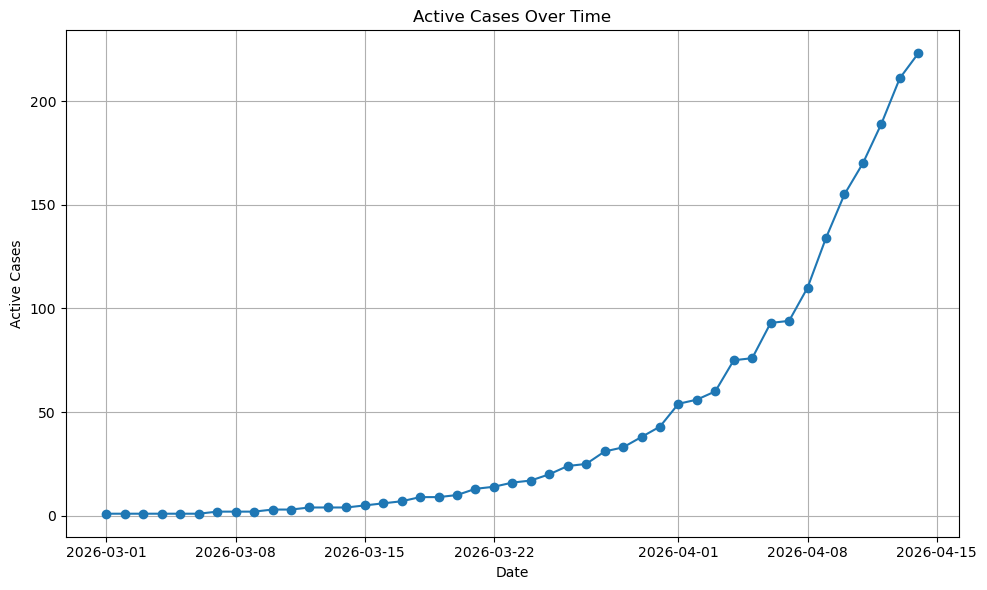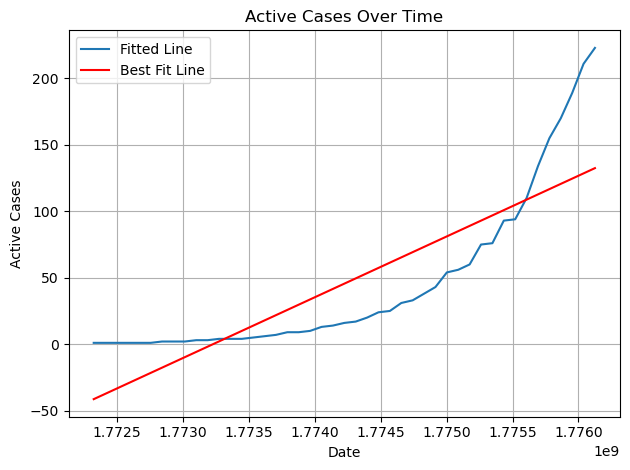
Here is our estimate of R0, and our analysis of our results as well:

R0 estimate: 0.00041

Reasoning/Methodology behind estimate: We incorporated the pre-symptomatic period with the symptomatic period, giving us an infectious period of within 7-11 days. We used the slope of the line of best fit as our best estimate of an average transmission rate over time, as it did signal a positive slope and proper growth over the graph. We then divided the same slope by 7 and did another calculation where we divided that slope by 11. We then took the average of those 2 to get our R0 estimate.

## What viruses have a similar R0? 
*Use the viruses.html file to find a virus or 2 with a similar R0 and give a 1-2 sentence background of the diseases.*
Nipah, Hendra, and Hantavirus are the 3 viruses to which we have the closest R0 to, even though our R0 doesn't match with them. 

### Nipah

Nipah virus is a zoonotic virus that is usually transmitted by bats, causing severe neurological issues such as seizures and headaches whilst also bringing along fever and cough, leading to high fatality rates in some South Asian to Southeast Asian countries such as India, Malaysia, and Singapore.

### Hendra

Hendra virus is another zoonotic virus largely connected to horses and 7 human cases, mainly in Australia. It usually starts with flu-like symptoms, slowly progressing to severe respiratory and neurological symptoms, concurring a high fatality rate.

## How accurate do you think your R0 estimate is?
I don't think our R0 estimate was very accurate. There may have been an issue with our calculations or with the way we may have interpreted some of the data points. 

### 2c. Use Euler's method to solve the SEIR model.
This section should come from your python code after Data Release #2.

### 2d. Fit the SEIR model to the data by changing beta, gamma, and sigma.
This section should come from your python code after Data Release #2.

### 2e. Plot the model-predicted infections over time compared to the data.
This section should come from your python code after Data Release #2.

### 2e. Predict the day and amount of active cases at the peak of the epidemic spread.
This section should come from your python code after Data Release #2.



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #3</b> 

</div>



### 2f. Plot the full dataset (Data Release #3) against your model.
This section should come from your python code after Data Release #3.


### 2g. Intervention strategies for new outbreak at VT (70 days of infection)
This section should come from your python code after Data Release #3.



## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*